In [7]:
cities, years = [], []
for games in open('files/games.txt'):
    vals = games.split()
    # combine all the values except last one
    city = ' '.join(vals[:-1])
    # last val is year, this -1 will go to last spot
    # remove parantesis around year as well
    year = vals[-1].strip('()')
    # end will remove extra \n
    print("City: ", city, " year: ", year)
    cities.append(city)
    years.append(year)

City:  Athens  year:  1896
City:  Paris  year:  1900
City:  St Louis  year:  1904
City:  London  year:  1908
City:  Stockholm  year:  1912
City:  Antwerp  year:  1920
City:  Paris  year:  1924
City:  Amsterdam  year:  1928
City:  Los Angeles  year:  1932
City:  Berlin  year:  1936
City:  London  year:  1948
City:  Helsinki  year:  1952
City:  Melbourne / Stockholm  year:  1956
City:  Rome  year:  1960
City:  Tokyo  year:  1964
City:  Mexico  year:  1968
City:  Munich  year:  1972
City:  Montreal  year:  1976
City:  Moscow  year:  1980
City:  Los Angeles  year:  1984
City:  Seoul  year:  1988
City:  Barcelona  year:  1992
City:  Atlanta  year:  1996
City:  Sydney  year:  2000
City:  Athens  year:  2004
City:  Beijing  year:  2008
City:  London  year:  2012
City:  Rio  year:  2016


The Examples of comprehension where we group the results into a collection / container

In [8]:
results = []

for city, year in zip(cities, years):
    if int(year) > 1945:
        results.append(city + ":" + year)
print(results)

### or make it comprehension based
results = [city + ":" + year for city, year in zip(cities, years) if int(year) > 1945]
print(results)

### or make it a map
results = {city: year for city, year in zip(cities, years) if int(year) > 1945}
print(results)

### or set
results = {city for city, year in zip(cities, years) if int(year) > 1945}
print(results)


['London:1948', 'Helsinki:1952', 'Melbourne / Stockholm:1956', 'Rome:1960', 'Tokyo:1964', 'Mexico:1968', 'Munich:1972', 'Montreal:1976', 'Moscow:1980', 'Los Angeles:1984', 'Seoul:1988', 'Barcelona:1992', 'Atlanta:1996', 'Sydney:2000', 'Athens:2004', 'Beijing:2008', 'London:2012', 'Rio:2016']
['London:1948', 'Helsinki:1952', 'Melbourne / Stockholm:1956', 'Rome:1960', 'Tokyo:1964', 'Mexico:1968', 'Munich:1972', 'Montreal:1976', 'Moscow:1980', 'Los Angeles:1984', 'Seoul:1988', 'Barcelona:1992', 'Atlanta:1996', 'Sydney:2000', 'Athens:2004', 'Beijing:2008', 'London:2012', 'Rio:2016']
{'London': '2012', 'Helsinki': '1952', 'Melbourne / Stockholm': '1956', 'Rome': '1960', 'Tokyo': '1964', 'Mexico': '1968', 'Munich': '1972', 'Montreal': '1976', 'Moscow': '1980', 'Los Angeles': '1984', 'Seoul': '1988', 'Barcelona': '1992', 'Atlanta': '1996', 'Sydney': '2000', 'Athens': '2004', 'Beijing': '2008', 'Rio': '2016'}
{'Beijing', 'Athens', 'London', 'Montreal', 'Barcelona', 'Helsinki', 'Moscow', 'Los A

In [9]:
import numpy as np
import matplotlib.pyplot as pp
import geopy as geo
import cartopy

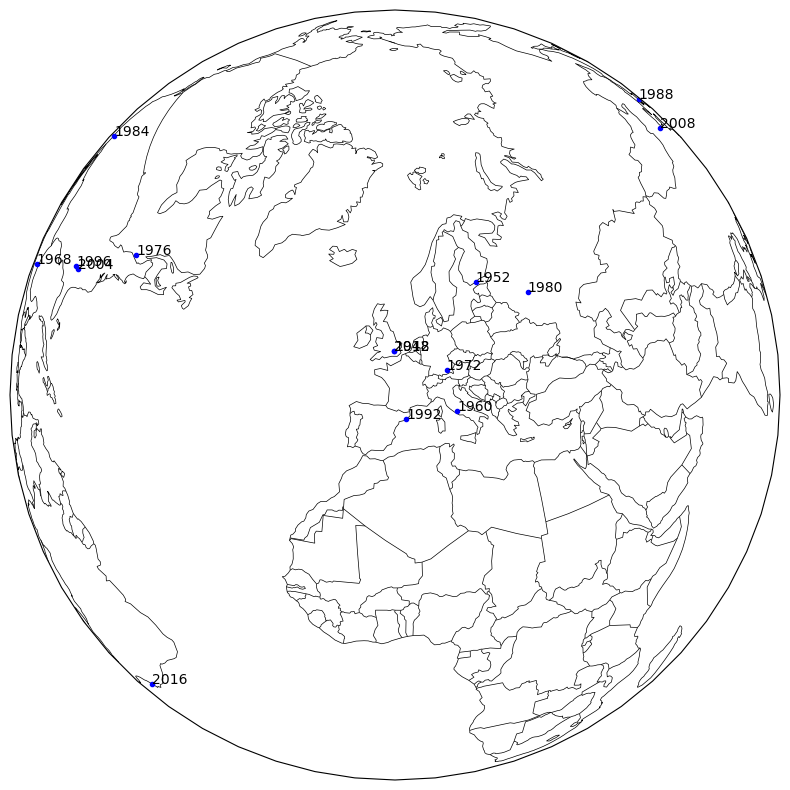

In [11]:
pp.figure(figsize=(10,10))

geo = geo.geocoders.Nominatim(user_agent='dmitriy-efficient-prog')

axes = pp.axes(projection = cartopy.crs.Orthographic(central_latitude=45, central_longitude=0))
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

cities_by_year = {year:city for city, year in zip(cities, years) if int(year) > 1945}
for year, city in cities_by_year.items():
    location = geo.geocode(city.split('/')[0])
    lon,lat = (location.longitude, location.latitude)
    
    if lon < 130:
        axes.plot(lon, lat, 'b.', transform=cartopy.crs.Geodetic())
        axes.text(lon, lat, year, transform=cartopy.crs.Geodetic())
        
axes.set_global()

The generators - the method of generating data and sending it into a function with anticipation of lazy iteration

In [12]:
even = (i ** 2 for i in range(20) if i % 2 == 0)
# () will create a generator while [] will create a vector
# first is lazy and second is eager
print(even)

<generator object <genexpr> at 0x15e33a740>


In [13]:
even.__next__()
even.__next__()
even.__next__()

16

In [14]:
def fib(fmax=10000):
    print("Fib")
    f1,f2 = 0, 1
    while True:
        yield f2
        
        f1, f2 = f2, f1 + f2
        
        if f2 > fmax:
            return

In [15]:
f = fib()
f
print(f.__next__())
print(f.__next__())
print(f.__next__())
print(f.__next__())
print(f.__next__())
print(f.__next__())

Fib
1
1
2
3
5
8


In [16]:
f = fib(100)
for i in range(10):
    print(f.__next__())

Fib
1
1
2
3
5
8
13
21
34
55
